### Aim of this project is compare effectivnes of three models: Linear regression, Tree Classifier and Random forest classifier in solving classification problem - predicting class to which specyffic entry belongs, based on values of diffrent parameteres assigned to it. Models will be compared based on their accuracy score, which describes how accurate specyffic model was in predicting to which class specyffic entry belongs. 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as pltimg
import seaborn as sns 
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
 

## Dataset validation and spliting into training and test subsets

In [31]:
df = pd.read_csv('dataset_61_iris.csv',index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 150 entries, 5.1 to 5.9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalwidth   150 non-null    float64
 1   petallength  150 non-null    float64
 2   petalwidth   150 non-null    float64
 3   class        150 non-null    object 
dtypes: float64(3), object(1)
memory usage: 5.9+ KB


### Checking if there are null values in specific columns.

### Evaluating the diffrence in number of categories in class column

<AxesSubplot:xlabel='class', ylabel='count'>

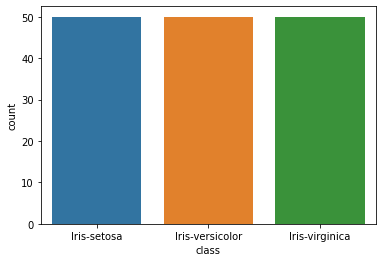

In [7]:
sns.countplot( x = df.columns[3],data=df)

In order to ensure provided data has somewhat even split of specyffic categories in 'class' column which is important for model training generated a countplot.

### Conclussion -  split of classes is even therfore data is suitable for training

### Spliting dataset into training and test subsets, standarization of the dataset. 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:3],df.iloc[:,3],test_size=0.4,random_state=101)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic regression

In [67]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
df_y_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_y_comp

,Actual,Predicted
sepallength,,
5.5,Iris-setosa,Iris-setosa
5.4,Iris-setosa,Iris-setosa
5.0,Iris-setosa,Iris-setosa
7.2,Iris-virginica,Iris-virginica
7.0,Iris-versicolor,Iris-versicolor
6.3,Iris-virginica,Iris-virginica
6.2,Iris-versicolor,Iris-versicolor
5.5,Iris-versicolor,Iris-versicolor
6.3,Iris-virginica,Iris-virginica


### Analysis of model coefficients in order to determine correlation between different parameters of an entry and label assigned to it.

<BarContainer object of 3 artists>

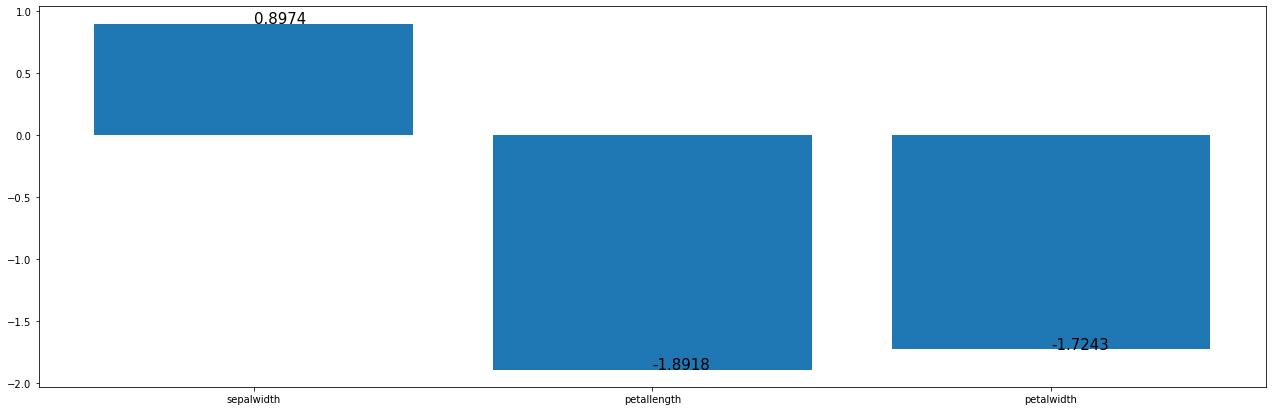

In [34]:
features_names = np.array([x for x in df.iloc[:,:3]])
values = [coefs for coefs in model.coef_[0]]
plt.figure(figsize = (22, 7))

for i,j in zip(features_names,values):
    plt.annotate(str(round(j,4)),xy=(i,j),fontsize = 15)

plt.bar(features_names,values,width = 0.8)

### Analysis  
Created plot indicates that petallength has the biggest impact on decision to which class assign specific entry.

### Evaluation of model effectiveness

In [68]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


## Decission tree

### Evaluation of the most optimal depth for a tree

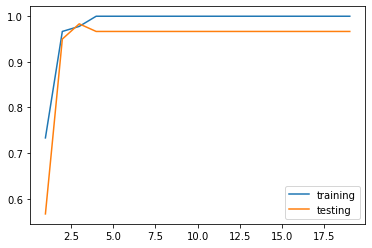

In [49]:
i_list=[]
test_list=[]
train_list=[]
for i in range(1,20):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc = dtc.fit(X_train, y_train)
    test_score = dtc.score(X_test,y_test)
    train_score = dtc.score(X_train,y_train)
    i_list.append(i)
    test_list.append(test_score)
    train_list.append(train_score)
plt.plot(i_list,train_list,label = "training")
plt.plot(i_list,test_list, label = "testing")
plt.legend()

First step is to determinate the optimal depth of a tree. In this case scores (which are mean accuracy on the given data set and labels) are ploted and decission is made base od values of the score and how similar are said values to each other for given depth.
### Conclussion: Based on onalysis of the plot depth = 3 was picked as values for both testing and training are quite simmilar while pretty high but at the same time plot waveform at this specyffic point doesn't suggest overfiting.  

### Model training

Score for training: 0.9777777777777777
Score for testing: 0.9833333333333333


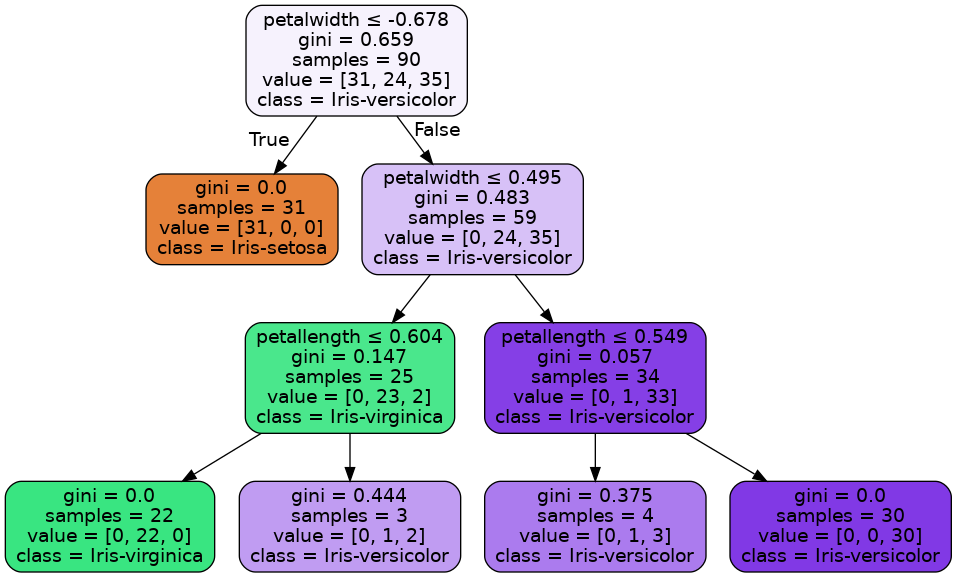

In [61]:
feature_names=df.iloc[:,:3].columns
class_names=['Iris-setosa','Iris-virginica','Iris-versicolor']
clf = DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
print(f"Score for training: {clf.score(X_train,y_train)}")
print(f"Score for testing: {clf.score(X_test,y_test)}")
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,class_names=class_names, feature_names=feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
Image(graph.create_png())


### Evaluation of model effectiveness

In [63]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9833333333333333


## Random forest classifier 

### Model training using optimal depth already determined in analysis of Classifier Tree model. 

For depth = 3, best estimator = 53
Score for training: 0.9777777777777777
Score for testing: 0.9666666666666667


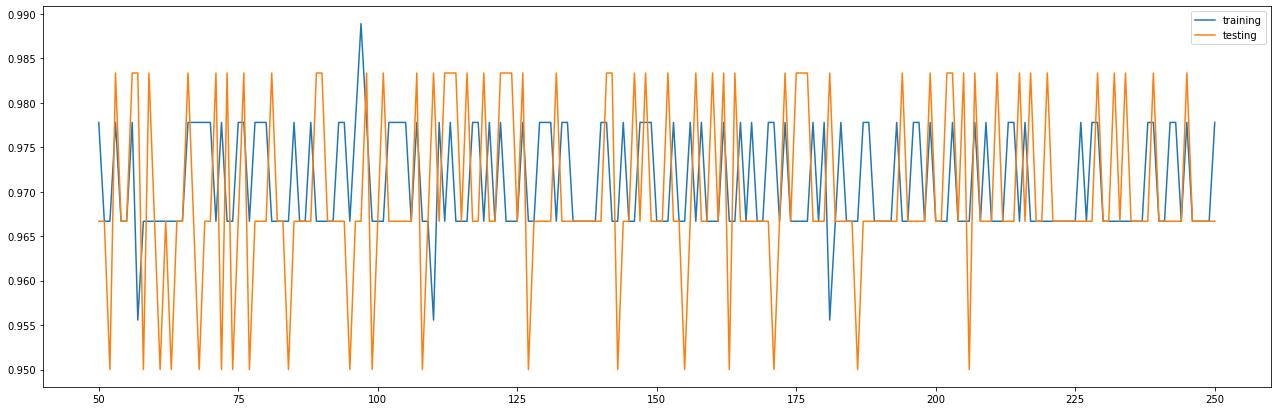

In [65]:
i_list=[]
test_list=[]
train_list=[]
best_estimator = 0
best_score_train = 0
best_score_test = 0
maxDepth = 3
for x in range (50,251):
  clf = RandomForestClassifier(n_estimators = x,max_depth = maxDepth)
  clf.fit(X_train, y_train)
  test_score = clf.score(X_test,y_test)  
  train_score = clf.score(X_train,y_train)
  i_list.append(x)
  test_list.append(test_score)
  train_list.append(train_score)
  if best_score_test < test_score :
    best_score_test = test_score
    best_estimator = x



plt.figure(figsize = (22, 7))
plt.plot(i_list,train_list, label = "training")
plt.plot(i_list,test_list, label = "testing")
plt.legend()
clf = RandomForestClassifier(n_estimators = best_estimator,max_depth= maxDepth)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)

print(f"For depth = {maxDepth}, best estimator = {best_estimator}")
print(f"Score for training: {clf.score(X_train,y_train)}")
print(f"Score for testing: {clf.score(X_test,y_test)}")


### Evaluation of model effectiveness

In [66]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


## Finall conclussion
All three models are equally good in predicting to which class specific entry belongs.
